# 15.077: Problem Set 6
Alex Berke (aberke)

##  Reading
Hastie, T., Tibshirani, R., and Friedman, J., The Elements of Statistical Learning: Data Mining, Inference and Prediction, Springer, 2nd ed., 2009 (ISBN 978-0-387-84857-0). https://web.stanford.edu/~hastie/ElemStatLearn/

4.1-4.5, 18.3.2,  18.3.3, 18.4, 18.4.1, 9.1-9.2, 12.1-12.2, 12.3.1-12.3.2, 12.3.6

In [1]:
%config Completer.use_jedi = False # autocomplete

import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn import tree


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Problems

### 1. Financial Condition of Banks.
The file Banks.xls includes data on a sample of 20 banks.
The Financial Condition column records the judgment of an expert on the financial
condition of each bank. This response variable takes one of two possible values, weak or strong, according to the financial condition of the bank.
The predictors are two ratios used in the financial analysis of banks: 

TotLns&Lses/ Assets is the ratio of total loans and leases to total assets 

And

TotExp/Assets is the ratio of total expenses to total assets.

The target is to use the two ratios for classifying the financial condition of a new bank.


In [12]:
banks = pd.read_excel('Banks.xls').set_index('Obs')
banks

,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
Obs,,,,
1,1,8.1,0.13,0.64
2,1,6.6,0.10,1.04
3,1,5.8,0.11,0.66
4,1,12.3,0.09,0.80
5,1,4.5,0.11,0.69
6,1,9.1,0.14,0.74
7,1,1.1,0.12,0.63
8,1,8.9,0.12,0.75
9,1,0.7,0.16,0.56


In [22]:
y = banks['Financial Condition']
X = banks[['TotExp/Assets', 'TotLns&Lses/Assets']]

#### Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures provided. Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the  default cutoff value of 0.5.

See the use and comparison of 2  separate libraries below: Their estimated coefficients agree.

A constant is added to the data in order  to  estimate an intercept.

In [28]:
logit_model=sm.Logit(y,sm.add_constant(X))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320769
         Iterations 7
                            Logit Regression Results                           
Dep. Variable:     Financial Condition   No. Observations:                   20
Model:                           Logit   Df Residuals:                       17
Method:                            MLE   Df Model:                            2
Date:                 Tue, 13 Apr 2021   Pseudo R-squ.:                  0.5372
Time:                         14:26:05   Log-Likelihood:                -6.4154
converged:                        True   LL-Null:                       -13.863
Covariance Type:             nonrobust   LLR p-value:                 0.0005829
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.1876      6.122     -2.317      0.020     -26.187      -2.1

In [31]:
from sklearn.linear_model import LogisticRegression
C = 1e8 # by default sklearn uses regularization parameter C=1.0
lr = LogisticRegression(C=C).fit(X, y)
intercept = lr.intercept_[0]
coefs = lr.coef_[0]
print("intercept, TotExp/Assets, TotLns&Lses/Assets : ", intercept, coefs[0], coefs[1])

intercept, TotExp/Assets, TotLns&Lses/Assets :  -14.187313621075003 79.9626744545651 9.173044195385975


#### a. Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

#### i. The logit as a function of the predictors

Call p the probability that the bank has weak financial condition

logit(p) = log(p/(1-p)) = -14.19 + 79.96(TotExp/Assets) + 9.17(TotLns&Lses/Assets)


#### ii. The odds as a function of the predictors

$ \frac{p}{1-p}$ = e^[-14.19 \+ 79.96(TotExp/Assets) + 9.17(TotLns&Lses/Assets)]

#### iii. The probability as a function of the predictors

p = ( e^[-14.19 \+ 79.96(TotExp/Assets) + 9.17(TotLns&Lses/Assets)] ) / (1 + e^[-14.19 \+ 79.96(TotExp/Assets) + 9.17(TotLns&Lses/Assets)] )

#### b. Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio= 0.11.

From your logistic regression model, estimate the following four quantities for this bank: 
- the logit, 
- the odds, 
- the probability of being financially weak
- the classification of the bank.

In [45]:
x1 = [0.11, 0.6]

logit = intercept + coefs[0]*0.11 + coefs[1]*0.6
print('logit: %0.2f' % logit)
odds = np.exp(logit)
print('odds: p/(1-p) = %0.2f' % odds)

prob = odds/(1+odds)
print('computed manually: probability is financially weak: %0.4f' % prob)

print('computed by library: probability is financially weak: %0.4f '% lr.predict_proba([x1])[0][1])
print('classification: %s' % lr.predict([x1])[0])


logit: 0.11
odds: p/(1-p) = 1.12
computed manually: probability is financially weak: 0.5281
computed by library: probability is financially weak: 0.5281 
classification: 1


#### c. The cutoff value of 0.5 is used in conjunction with the probability of being financially weak.
#### Compute the threshold that should be used if we want to make a classification based on the odds of being financially weak, and the threshold for the corresponding logit.

The data is balanced

In [48]:
y.value_counts()

0    10
1    10
Name: Financial Condition, dtype: int64

In [50]:
p = 0.5
np.log(p/(1-p))

0.0

#### d. Interpret the estimated coefficient for the total loans and leases to total assets ratio (TotLns&Lses/ Assets) in terms of the odds of being financially weak.

The estimated TotLns&Lses/Assets  coefficient is 9.1732 (std. error 6.864).

Consider TotLns&Lses/Assets a unit. Then an increase of 1 unit accounts for an increase in the odds of being financially weak by exp(9.1732) = 9635.4087.  

A 1 unit increase would be equivalent to  a bank loaning out the  equivalence of its  total  assets. So instead consider a bank loaning  out an additional 0.001 (0.1%) of its total assets. This would increase its likelihood of being financially weak by 9.6354087 times.

In [41]:
np.exp(9.1732)

9635.408717193675

#### e. When a bank that is in poor financial condition is misclassified as financially strong, the misclassification cost is  much higher than when a financially strong  bank is misclassified as weak. To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

Decreased.

### 2. Competitive Auctions on eBay.com.

The file eBayAuctions.xls contains information on 1972 auctions transacted on eBay.com.  The goal is to use these data to build a model that will classify competitive auctions from noncompetitive ones. A competitive auction is defined as an  auction with at least two bids placed on the item auctioned.  The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). 
In addition, we have the price at which the auction closed.  The goal is to predict whether or not the auction will be competitive.



In [2]:
auctions = pd.read_excel('eBayAuctions.xls')
auctions.head(3)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0



#### Data Preprocessing.  
Create dummy variables for the categorical predictors.  These include Category (18 categories), Currency (USD, GBP, Euro), EndDay (Monday-Sunday), and Duration (1, 3, 5, 7, or 10 days).  Split the data into training and validation datasets using a 60% : 40% ratio.

In [3]:
X = auctions[auctions.columns[:-1]].drop('ClosePrice',axis=1) # closePrice not used for classification
y = auctions[auctions.columns[-1]]
X = pd.get_dummies(data=X, columns=['Category','currency','endDay','Duration'])
X.head()

,sellerRating,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print('X, y split into training and validatioin sets using a 60:40 ratio')
print('N train = %s' % len(X_train))
print('N validate = %s' % len(X_test))

X, y split into training and validatioin sets using a 60:40 ratio
N train = 1183
N validate = 789


#### A. Fit a classification tree using all predictors, using the best pruned tree.  
#### To avoid over fitting, set the minimum number of observations in a leaf node to 50.  Also, set the maximum number of levels to be displayed at seven.  To remain within the limitation of your software, combine some of the categories of categorical predictors.  Write down the results in terms of rules.
 

As we  can see below, there are many categories where the total values  are  < 50, making it impossible to consider that feature for splitting in the tree, since we  require  at least 50 samples  in any leaf node.

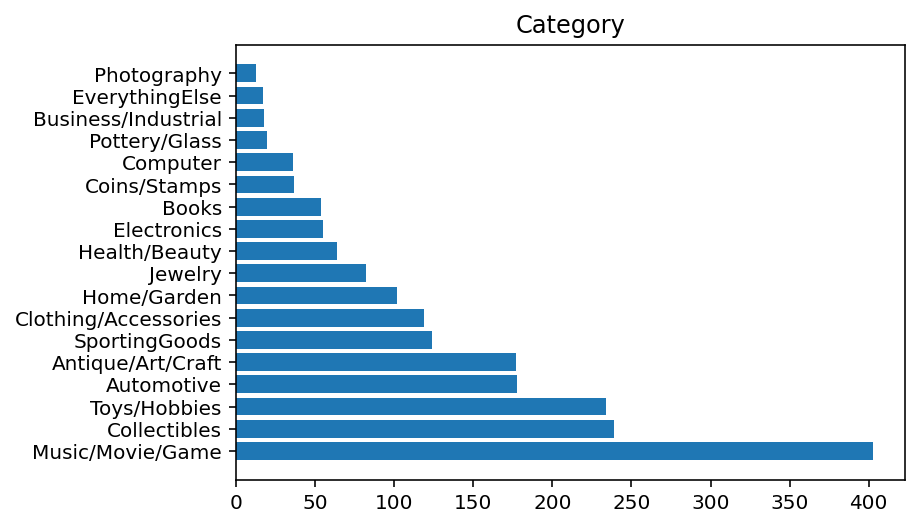

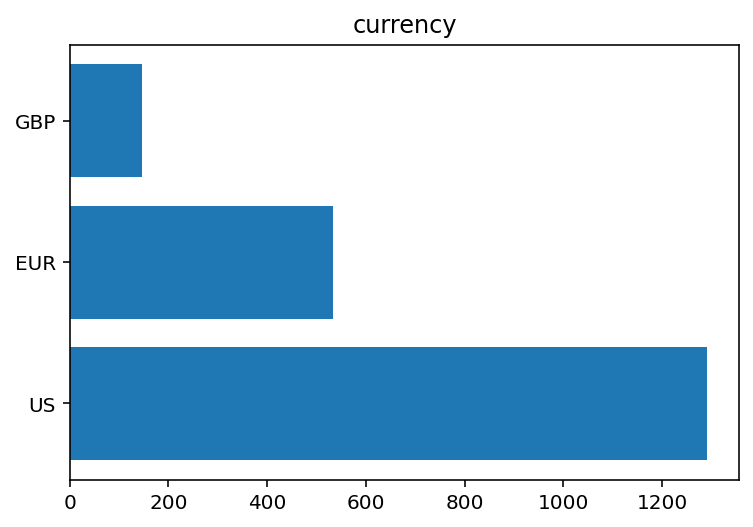

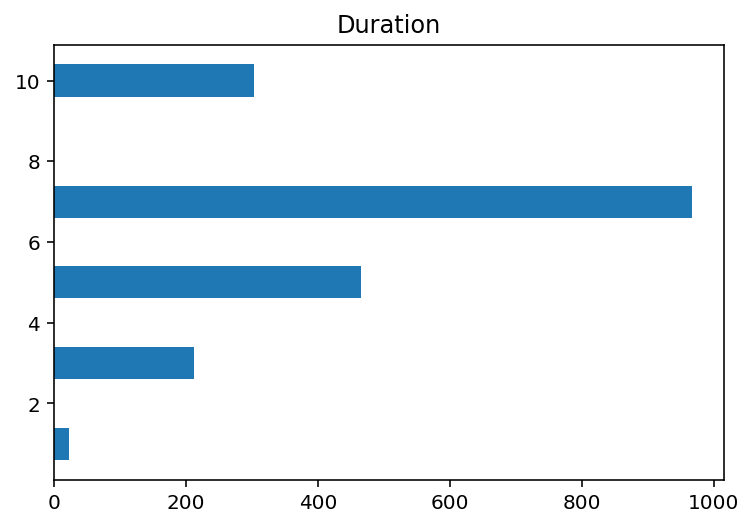

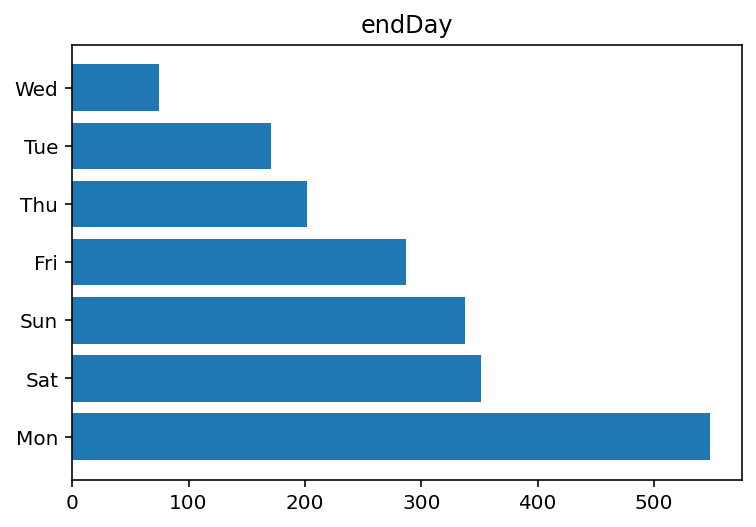

In [5]:
for c in ['Category', 'currency','Duration','endDay']:
    fig,ax = plt.subplots(1)
    ax.barh(auctions[c].value_counts().index, auctions[c].value_counts())
    ax.set_title(c)

We combine categorical variables as  follows.

'Category' variables with N < 100 become 'EverythingElse'.

'Duration' is collapsed to 3 levels: < 5 days, 5 days, > 5 days

In [7]:
category_counts = auctions['Category'].value_counts()
small_categories = category_counts[category_counts < 100]
small_categories

Jewelry                82
Health/Beauty          64
Electronics            55
Books                  54
Coins/Stamps           37
Computer               36
Pottery/Glass          20
Business/Industrial    18
EverythingElse         17
Photography            13
Name: Category, dtype: int64

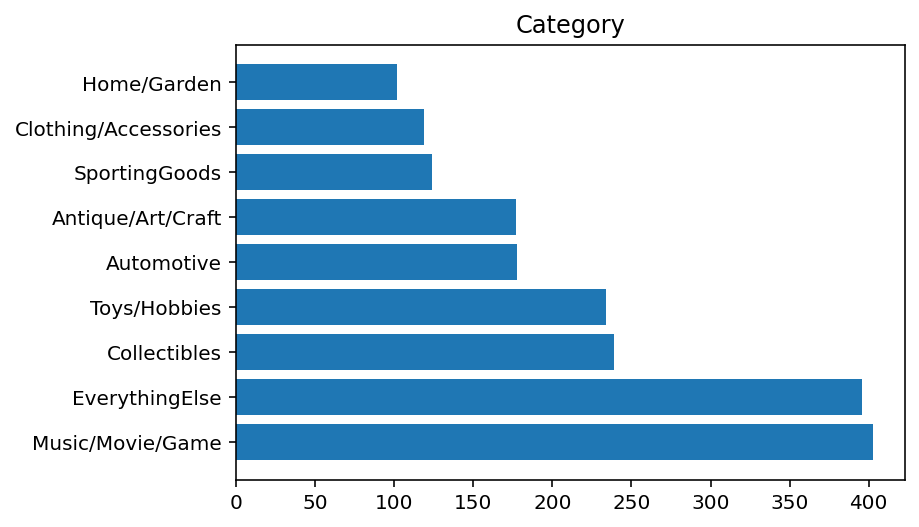

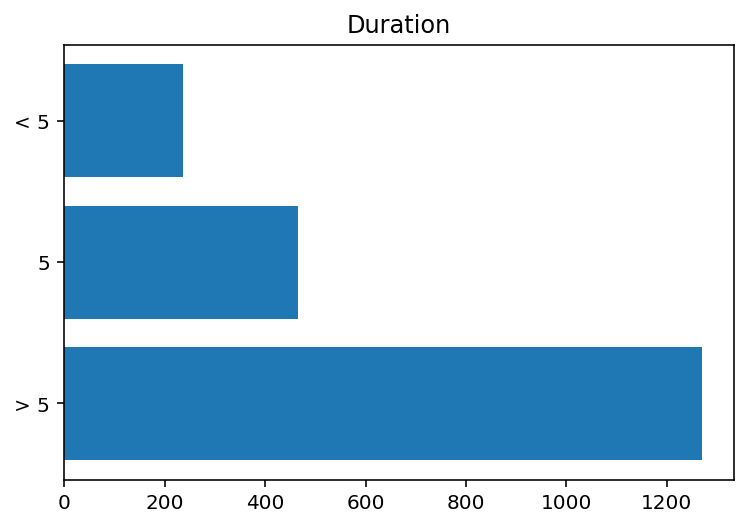

In [8]:
X1 = auctions[auctions.columns[:-1]].drop('ClosePrice', axis=1)
X1['Category'] = X1['Category'].map(lambda c: 'EverythingElse' if c in small_categories else c)
def duration3(d):
    if d < 5:
        return '< 5'
    elif d  > 5:
        return '> 5'
    return '5'
X1['Duration'] = X1['Duration'].map(duration3)

for c in ['Category', 'Duration']:
    fig,ax = plt.subplots(1)
    ax.barh(X1[c].value_counts().index, X1[c].value_counts())
    ax.set_title(c)

In [9]:
X = pd.get_dummies(data=X1, columns=['Category','currency','endDay','Duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X.head()

,sellerRating,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Clothing/Accessories,Category_Collectibles,Category_EverythingElse,Category_Home/Garden,Category_Music/Movie/Game,Category_SportingGoods,...,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_5,Duration_< 5,Duration_> 5
0,3249,0.01,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,3249,0.01,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,3249,0.01,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,3249,0.01,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,3249,0.01,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    random_state=0, # features are permuted at each  fit. Defining  random state makes classifier deterministic
    min_samples_leaf=50,
    max_depth=6,
).fit(X_train, y_train) 

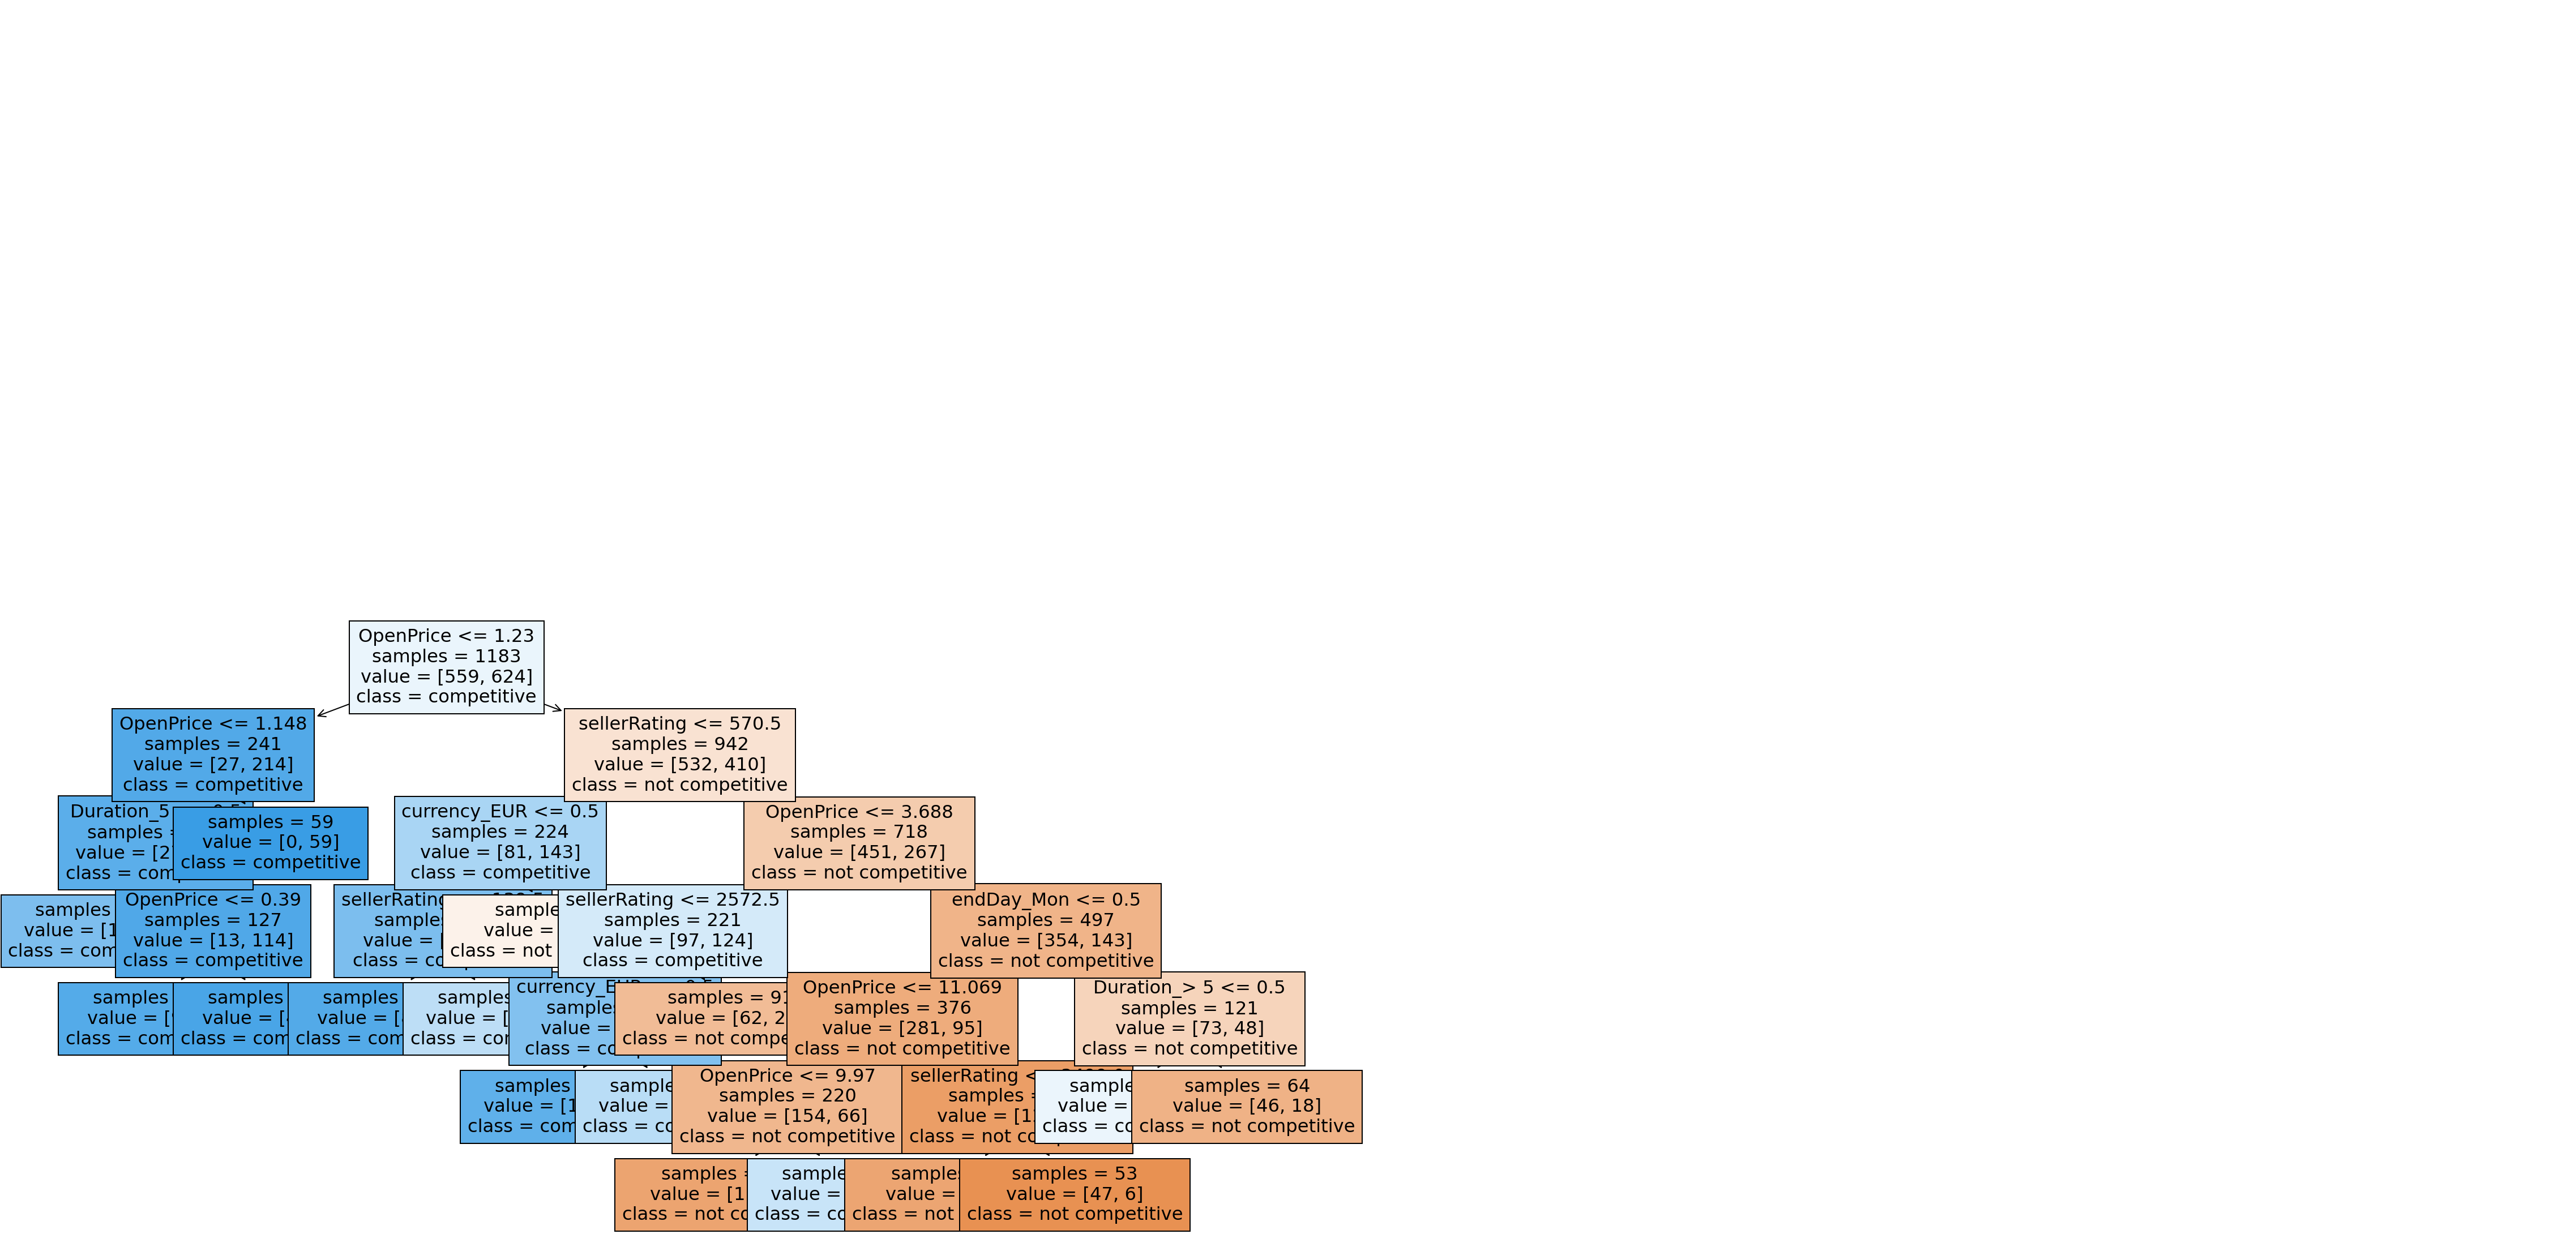

In [11]:
fig,ax = plt.subplots(1,1, figsize=(40,20))
_ = tree.plot_tree(clf, ax=ax, feature_names=X.columns, 
                   filled=True, impurity=False, class_names=['not competitive','competitive'])

#### B. Is this model practical for predicting the outcome of a new auction?

It does not take  much computational time to predict whether a new auction will be competitive based  on this model. In that  sense it may be practical.
However, I tested a few different versions of this model after tweaking the  features ways, and the  importance  of variables changed each time. This makes it  seem like  the  model is not robust -- and in that sense not 'practical' since   the data will continue to change as  new   auctions are made.

A more practical model might be a linear model  that   uses just the open price and seller rating as variables.

#### C. Describe the interesting and uninteresting information that these rules provide.

The most important variables in this model, by far, are 'sellerRating' and 'OpenPrice'. Currency and duration  and end day on Monday also have some importance. See below.

Something to note is  that the most  important variables are not categorical and most predictors carry no importance  at all. This may indicate  that another kind  of model  would be  more  appropriate.

In [13]:
pd.DataFrame(data={'feature':X.columns,'importance':clf.feature_importances_})

,feature,importance
0,sellerRating,0.262499
1,OpenPrice,0.624891
2,Category_Antique/Art/Craft,0.000000
3,Category_Automotive,0.000000
4,Category_Clothing/Accessories,0.000000
5,Category_Collectibles,0.000000
6,Category_EverythingElse,0.000000
7,Category_Home/Garden,0.000000
8,Category_Music/Movie/Game,0.000000
9,Category_SportingGoods,0.000000


#### D. Fit another classification tree (using the best-pruned tree, with a minimum number of observations per leaf node = 50 and maximum allowed number of displayed levels), this time only with predictors that can be used for predicting the outcome of a new auction.  Describe the resulting tree in terms of rules.  Make sure to report the smallest set of rules required for  classification.

The model uses just these predictors: open price, seller rating, currency, duration with 3 levels.

In [17]:
X = pd.get_dummies(data=X1[['currency','sellerRating','OpenPrice','Duration']], columns=['currency','Duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X.head()

,sellerRating,OpenPrice,currency_EUR,currency_GBP,currency_US,Duration_5,Duration_< 5,Duration_> 5
0,3249,0.01,0,0,1,1,0,0
1,3249,0.01,0,0,1,1,0,0
2,3249,0.01,0,0,1,1,0,0
3,3249,0.01,0,0,1,1,0,0
4,3249,0.01,0,0,1,1,0,0


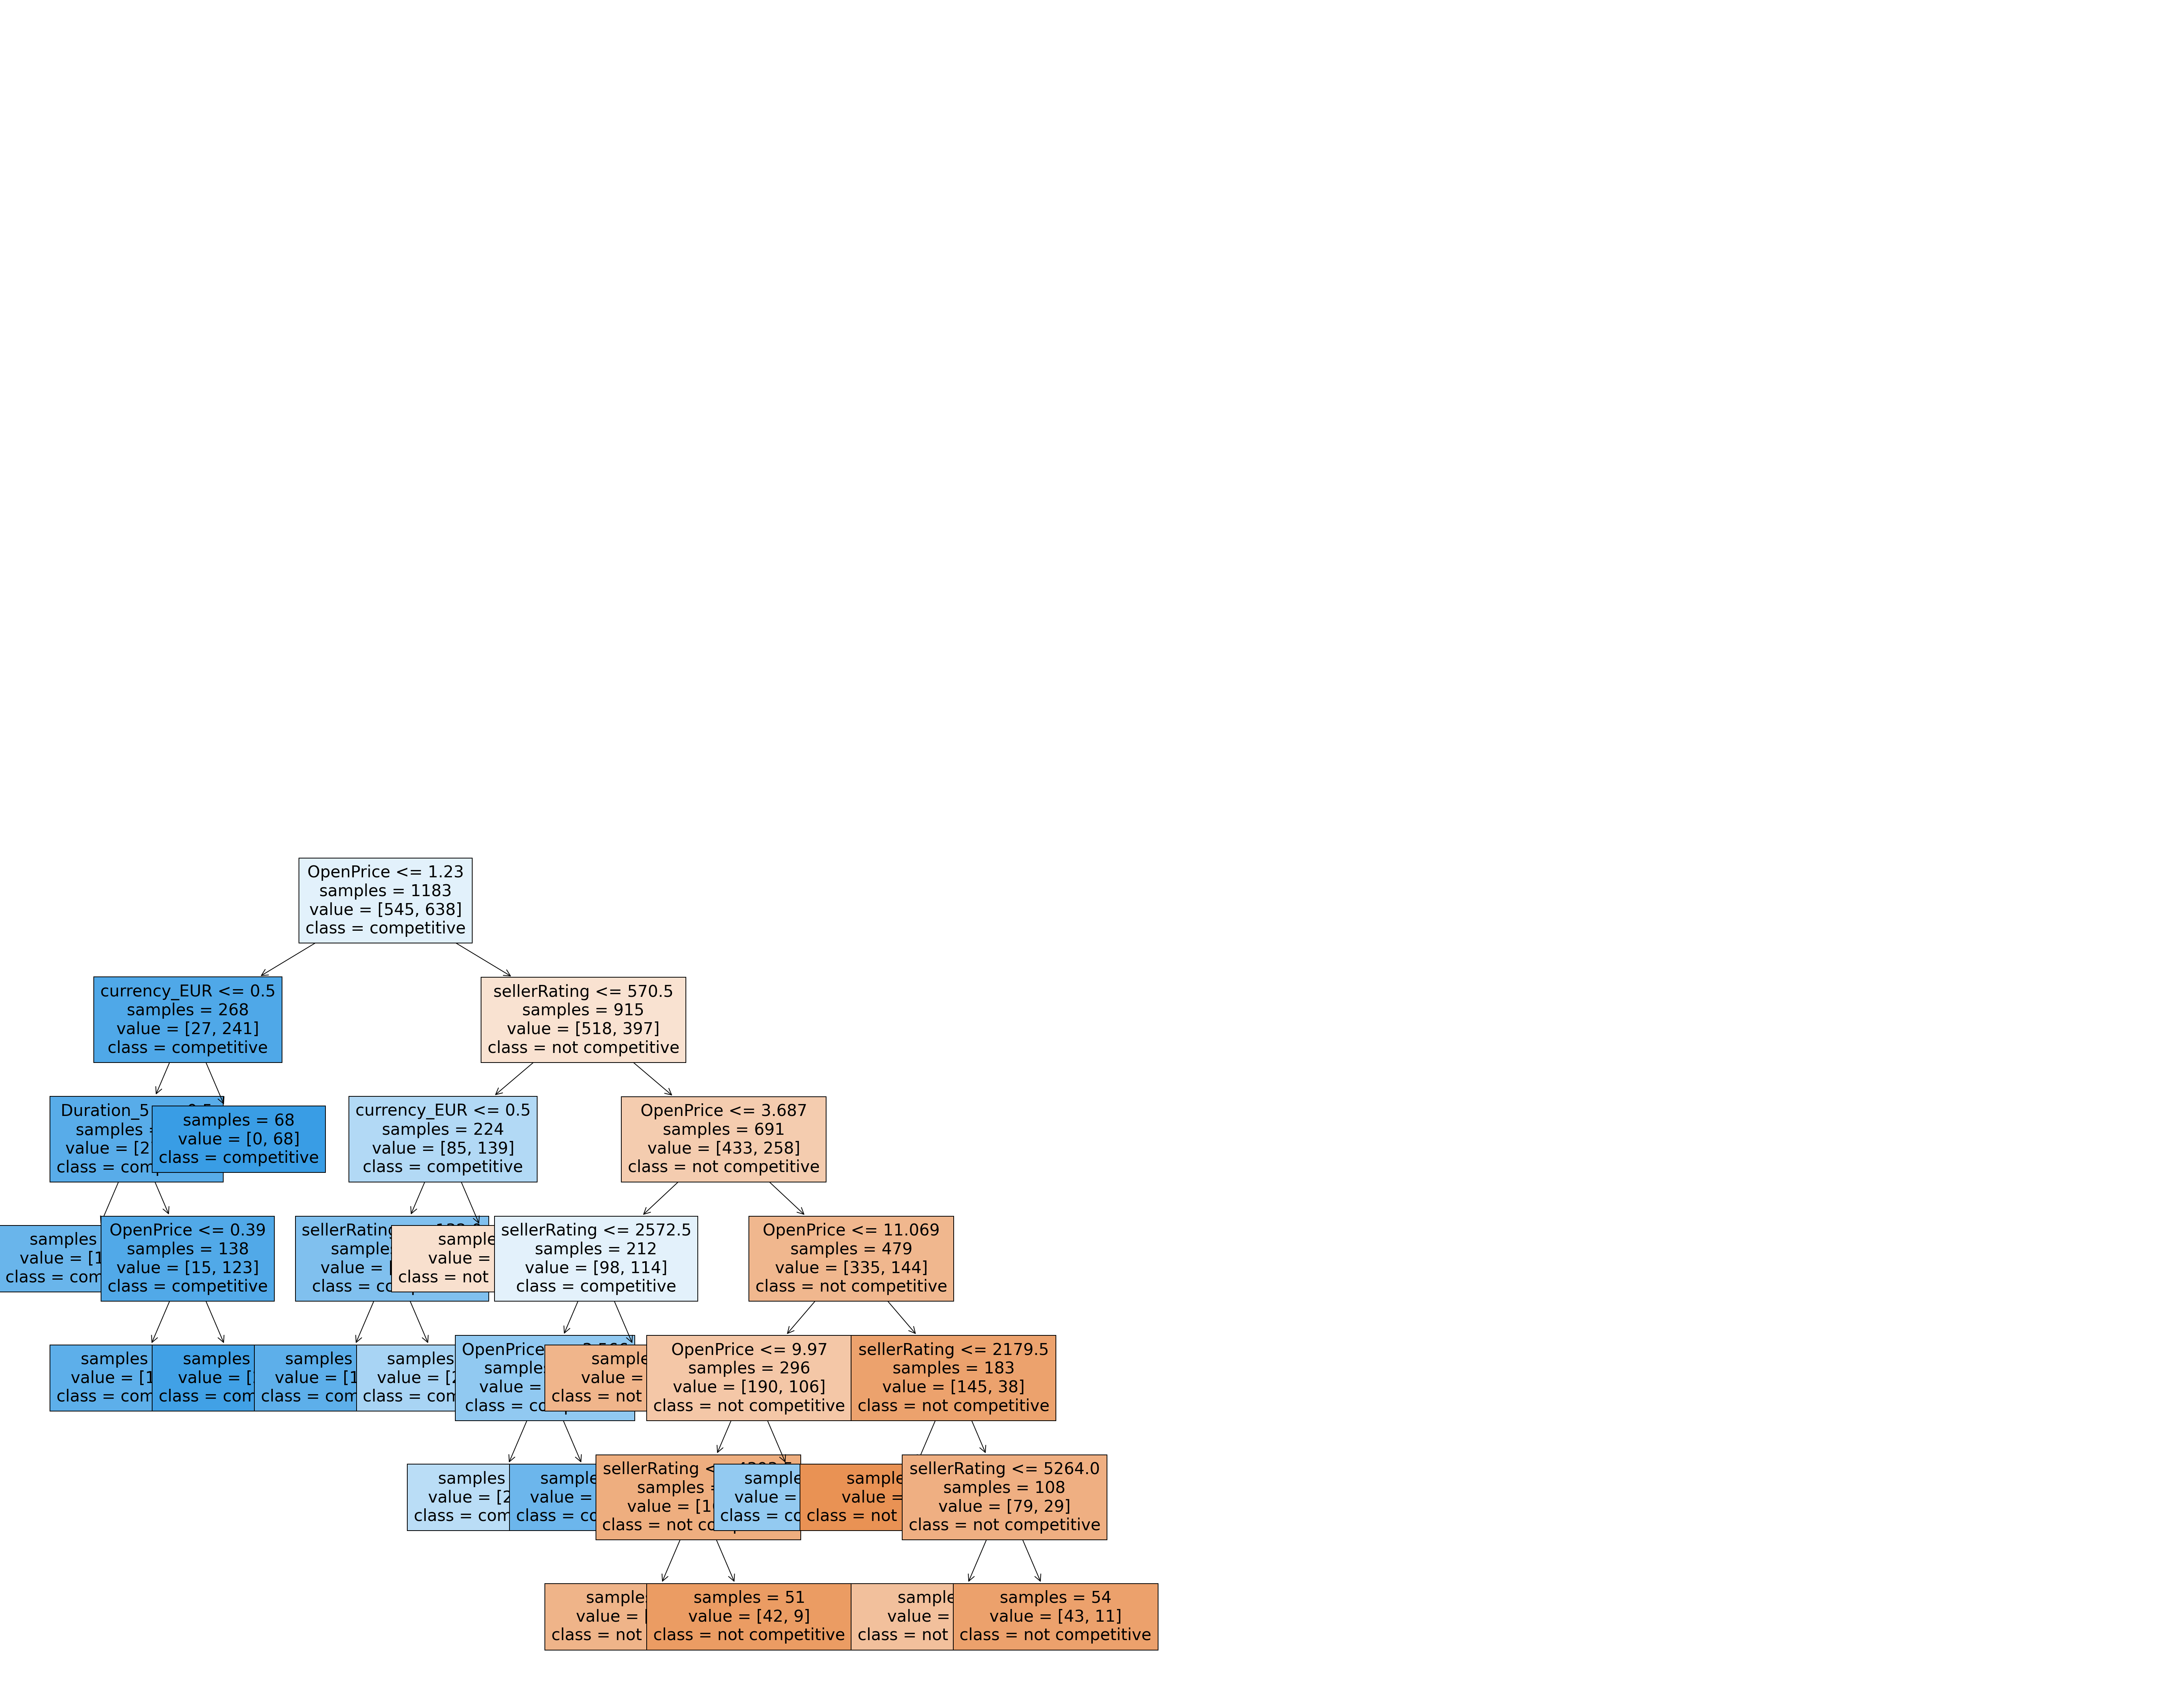

In [18]:
# 7 levels
clf = DecisionTreeClassifier(
    random_state=0, # features are permuted at each  fit. Defining  random state makes classifier deterministic
    min_samples_leaf=50,
    max_depth=6,
).fit(X_train, y_train)
fig, ax = plt.subplots(1,1, figsize=(50,40))
_ = tree.plot_tree(clf, ax=ax, feature_names=X.columns, 
                   filled=True, impurity=False, class_names=['not competitive','competitive']) 

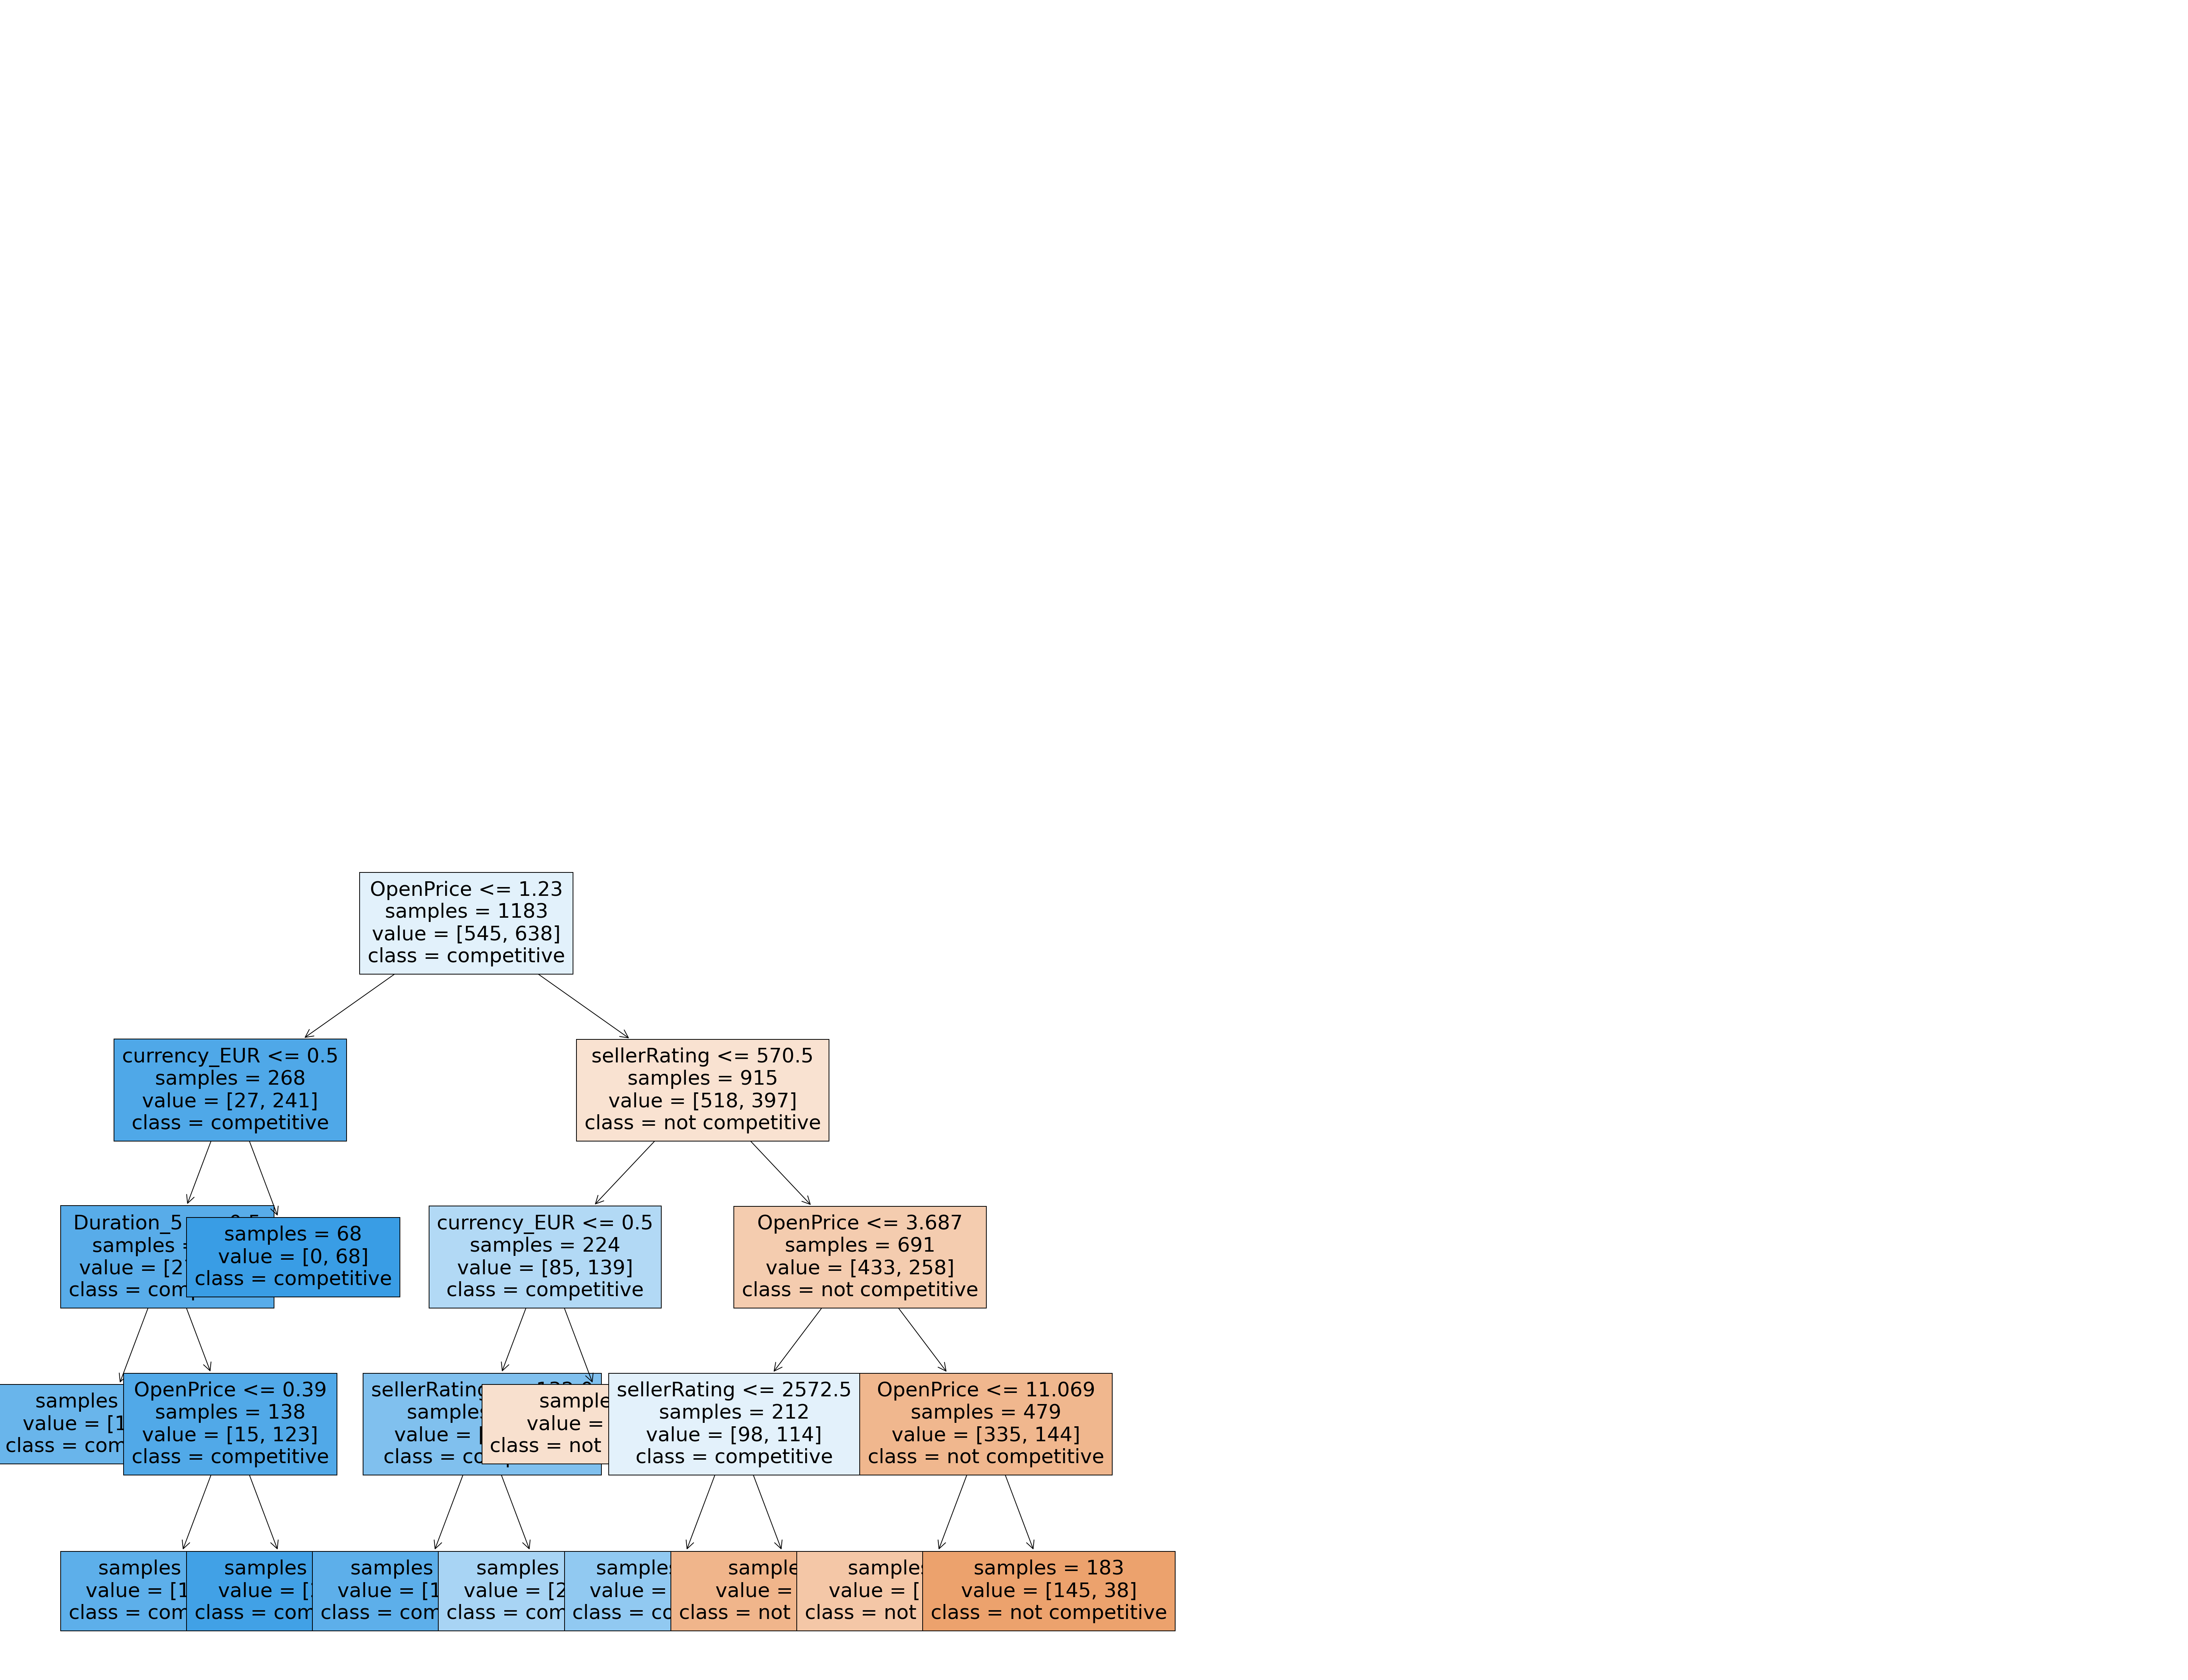

In [19]:
# 5  levels
clf = DecisionTreeClassifier(
    random_state=0, # features are permuted at each  fit. Defining  random state makes classifier deterministic
    min_samples_leaf=50,
    max_depth=4,
).fit(X_train, y_train)
fig, ax = plt.subplots(1,1, figsize=(50,40))
_ = tree.plot_tree(clf, ax=ax, feature_names=X.columns, 
                   filled=True, impurity=False, class_names=['not competitive','competitive']) 

#### E. Plot the resulting tree on a scatterplot: Use the two axes for the two best (quantitative) predictors.  Each auction will appear as a point, with coordinates corresponding to its values on those two predictors.  Use different colors or symbols to separate competitive and noncompetitive auctions.  Draw lines (you can sketch these by hand or use software) at the values that create splits.  Does this splitting seem reasonable with respect to the meaning of the two predictors?  Does it seem to do a good job of separating the two classes?

The  two important quantitative predictors are 'sellerRating' and 'OpenPrice'.

This tree  does not clearly separate the classes based on these predictors.

In [18]:
comp = auctions[auctions['Competitive?']==1]
non_comp = auctions[auctions['Competitive?']==0]
# non_comp.head()

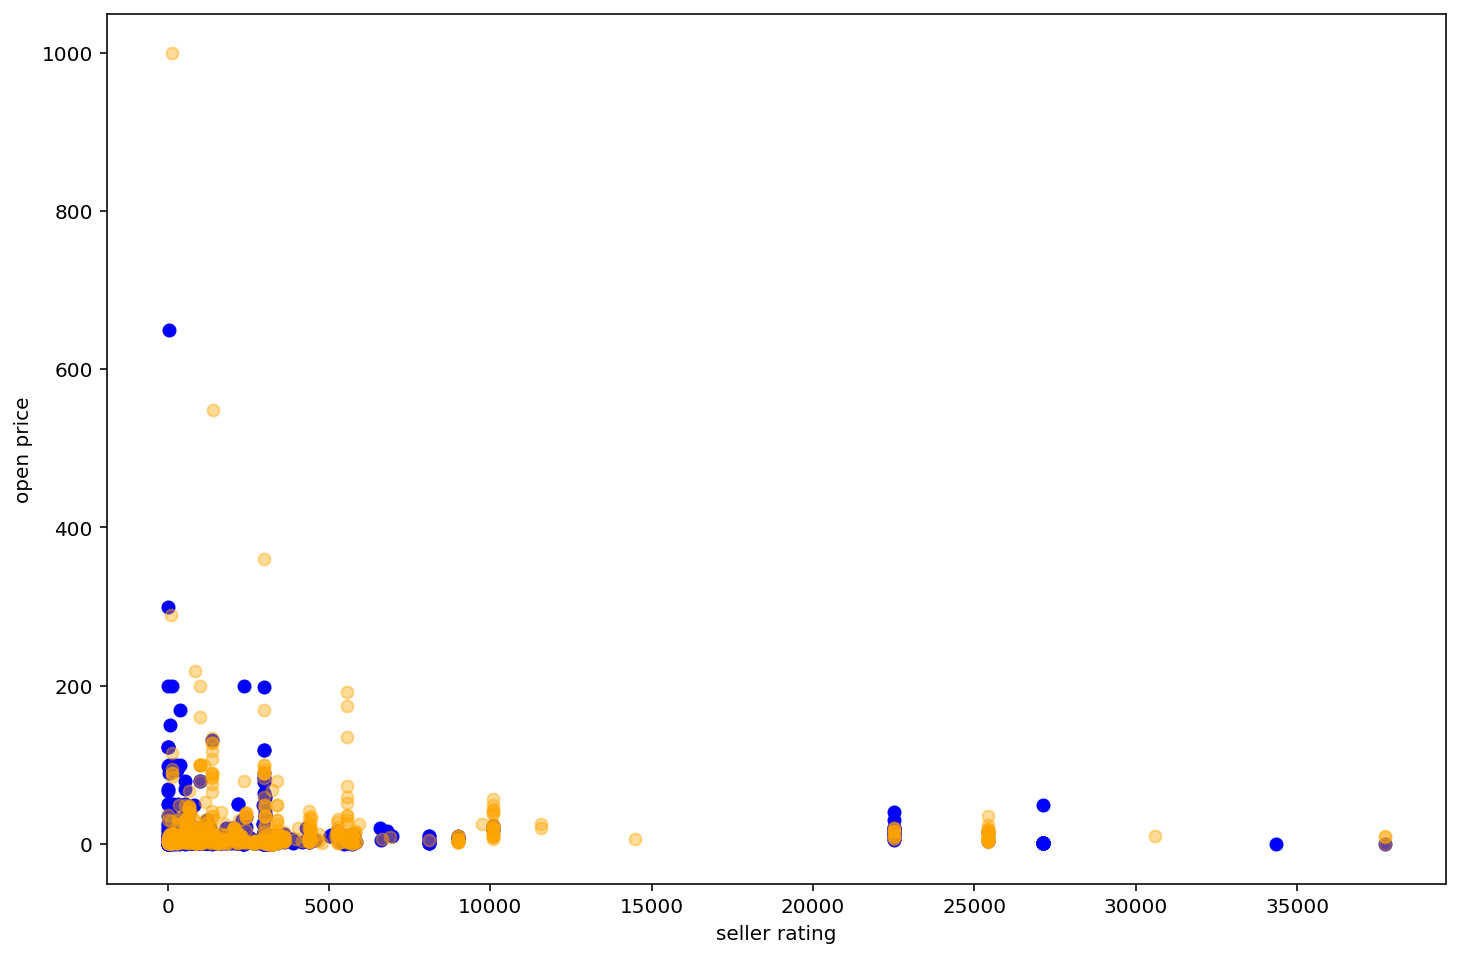

In [19]:
fig,ax = plt.subplots(1,1, figsize=(12,8))

ax.scatter(
    comp['sellerRating'],
    comp['OpenPrice'],
    color='b',
    alpha=1,
)
ax.scatter(
    non_comp['sellerRating'],
    non_comp['OpenPrice'],
    color='orange',
    alpha=0.4,
)
ax.set_xlabel('seller rating')
_ = ax.set_ylabel('open price')

fig.savefig('./sellerRating_vs_openPrice.png', dpi=200)

and then I  drew on it

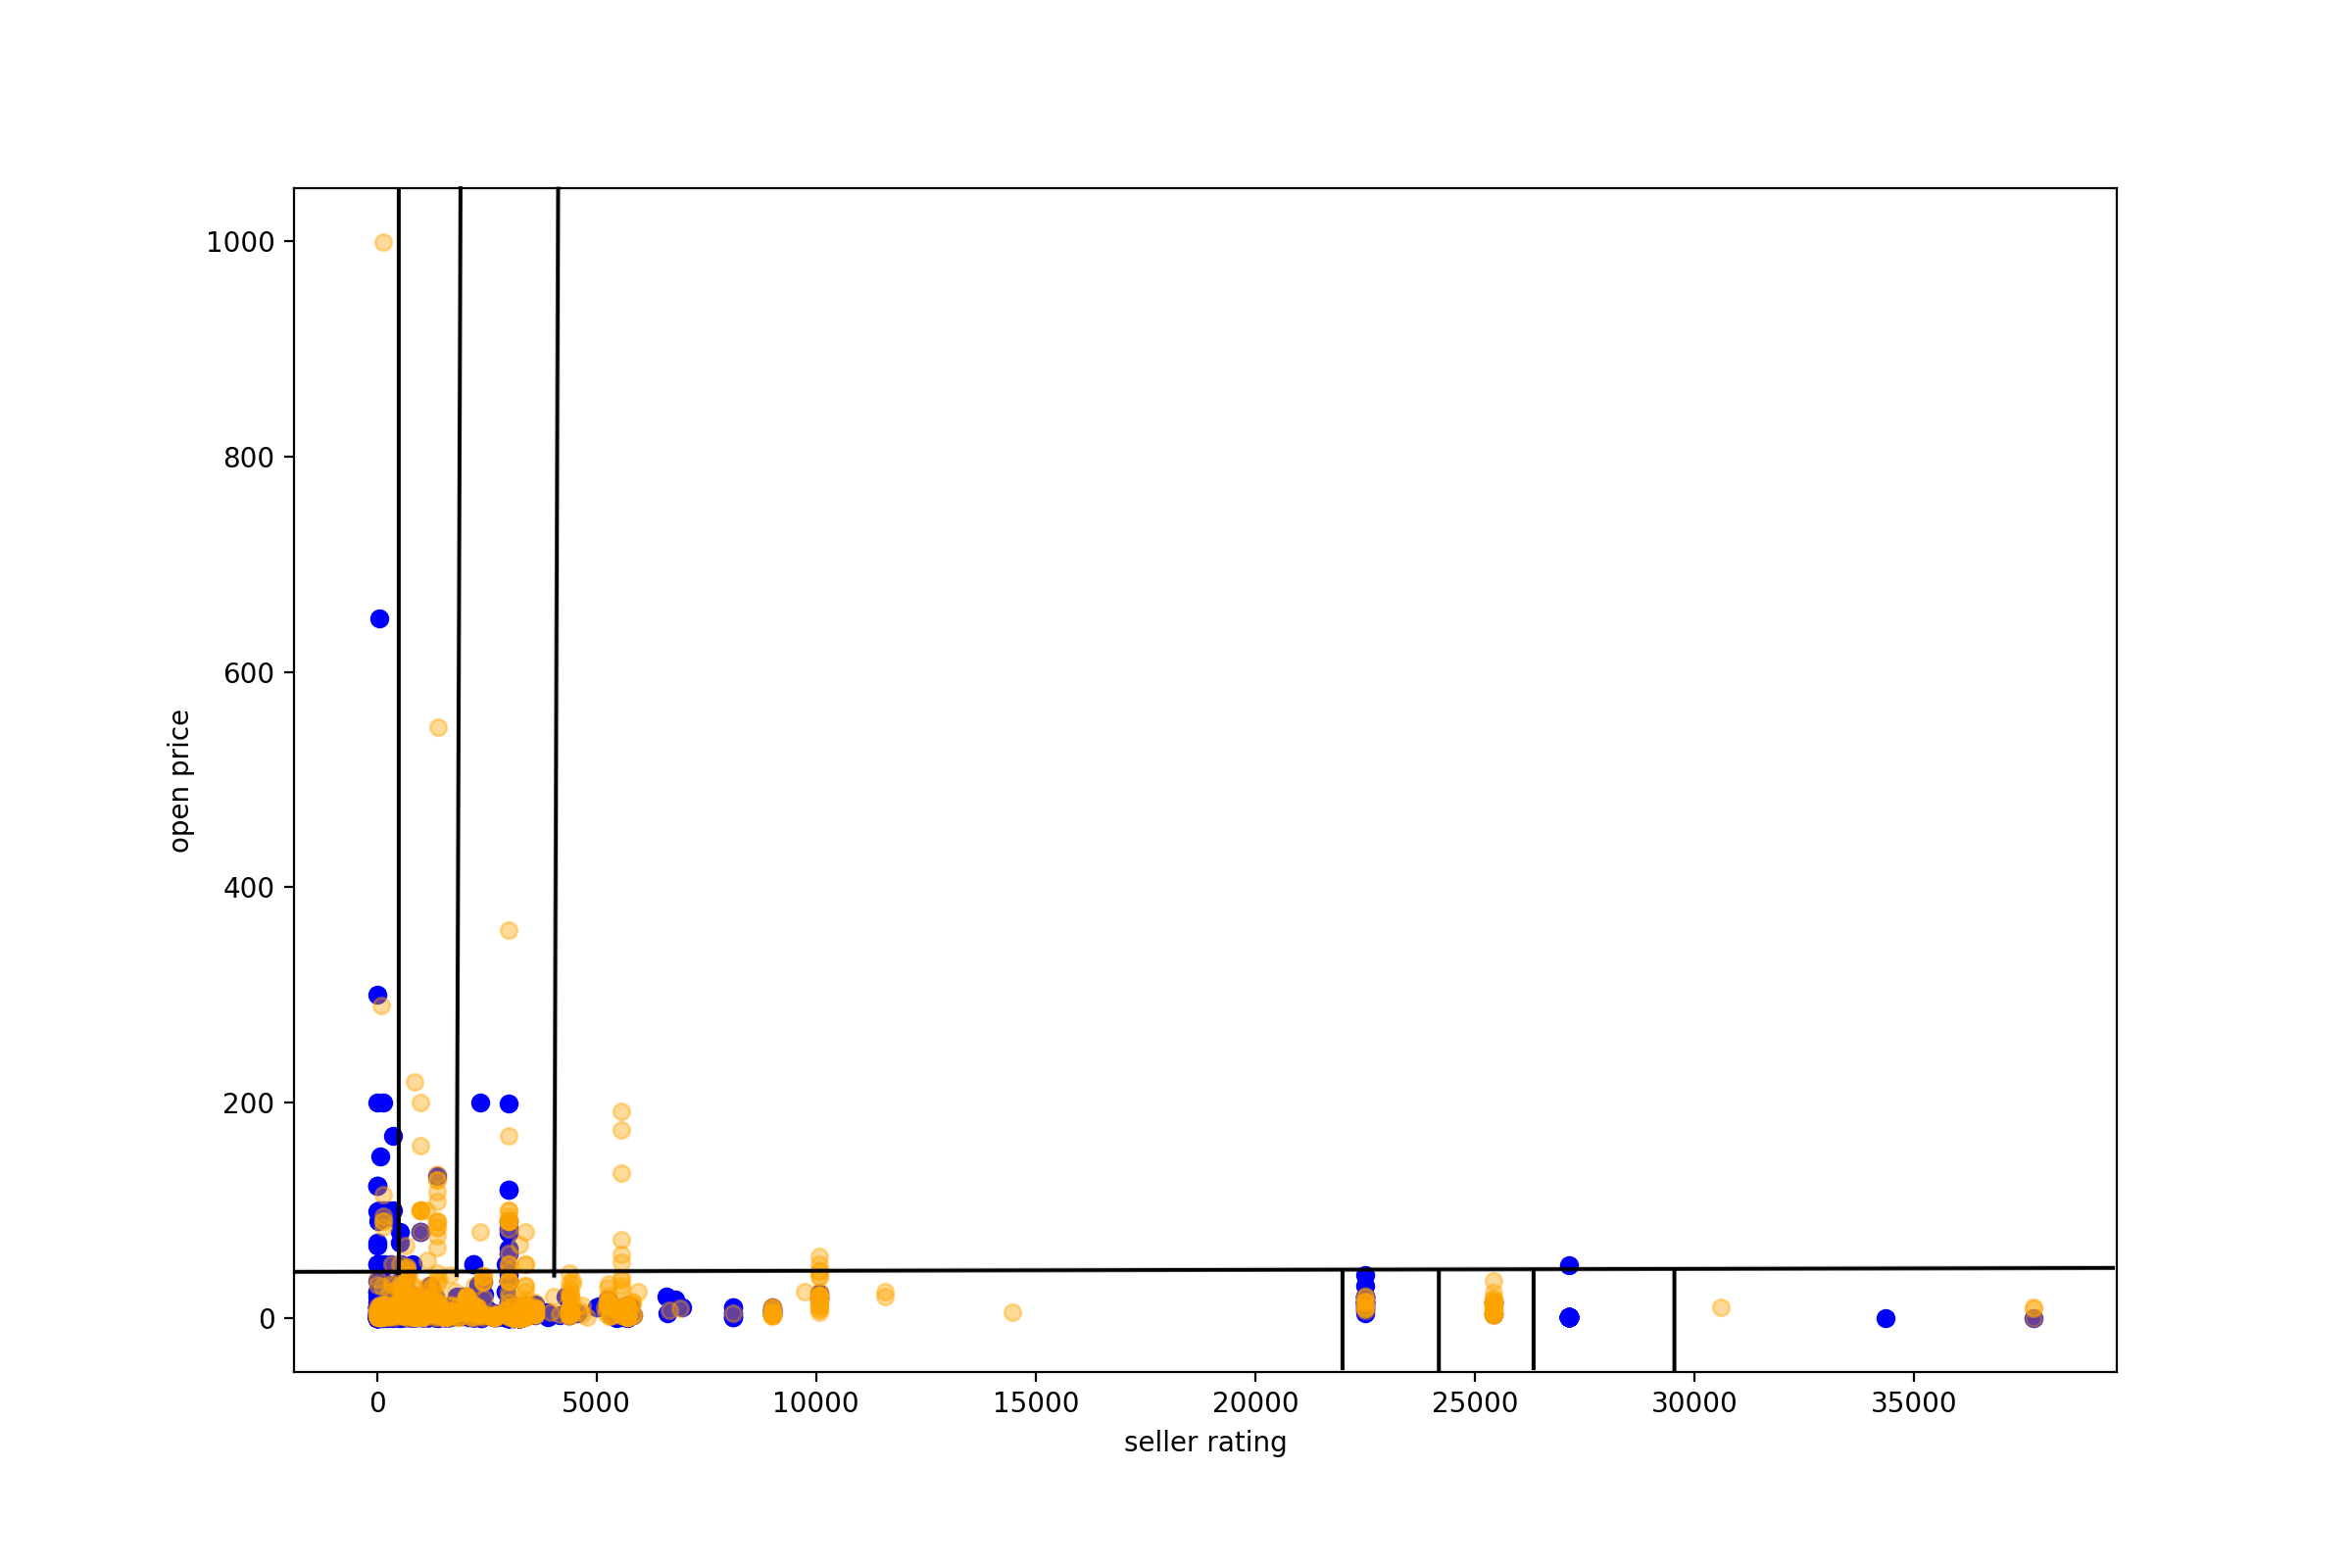

In [20]:
from IPython.display import Image
Image(filename='./sellerRating_vs_openPrice_modified.png') 

#### F. Examine the classification table for the tree.  What can you say about the predictive performance of this model?

So far we have only used the training data. Now  we use the validation data that was set aside.

The model makes predictions for the validation  data, and we  create a confusion matrix to examine the performance.

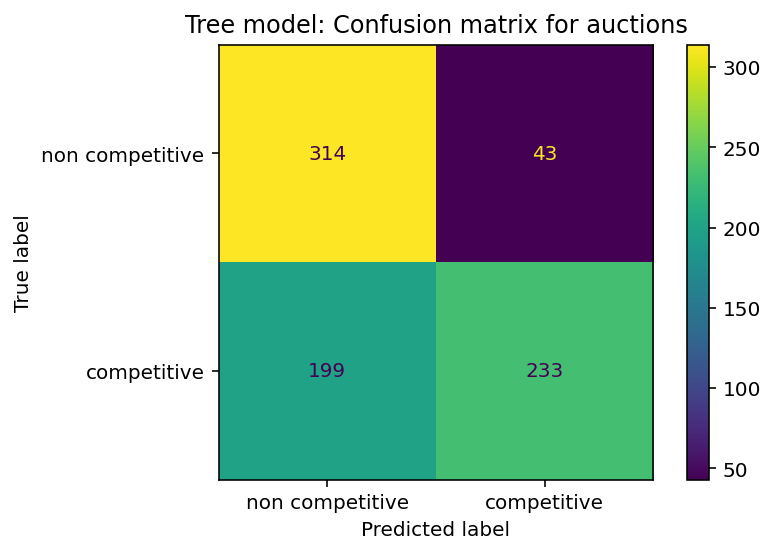

In [26]:
# test
predictions = clf.predict(X_test)
# make the confusion matrix
cm = confusion_matrix(y_test,  predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non competitive','competitive'])
disp.plot()
_ = plt.title('Tree model: Confusion matrix for auctions')

We can compare this to a naive (dummy) classifier that makes predictions based on the frequency of classes.

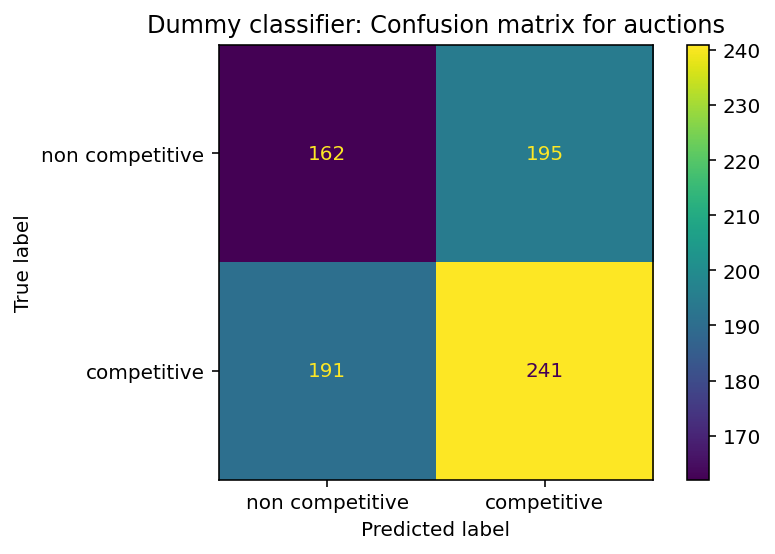

In [29]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(
    strategy="stratified",
    random_state=0, # deterministic
).fit(X_train, y_train)
dummy_predictions = dummy_clf.predict(X_test)
dummy_cm = confusion_matrix(y_test,  dummy_predictions, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=dummy_cm, display_labels=['non competitive','competitive']).plot()
_ = plt.title('Dummy classifier: Confusion matrix for auctions')

Now we compare the sensitivity and specificity for the tree vs naive classifiers.

Shown below we can see that the tree model is not very good. It does not outperform the naive model in terms of sensitivity. It does very much improve w.r.t. specicifity.

In [36]:
print('Tree model')
print('Sensitivity = 233 / (233 + 199) = %0.4f' % (233 / (233 + 199)))
print('Specificity = 314 / (314 + 43)  = %0.4f' % (314 / (314 + 43)))
print('\nDummy model')
print('Sensitivity = 241 / (241 + 191) = %0.4f' % (241 / (241 + 191)))
print('Specificity = 162 / (162 + 195) = %0.4f' % (162 / (162 + 195)))

Tree model
Sensitivity = 233 / (233 + 199) = 0.5394
Specificity = 314 / (314 + 43)  = 0.8796

Dummy model
Sensitivity = 241 / (241 + 191) = 0.5579
Specificity = 162 / (162 + 195) = 0.4538


#### G. Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)?  What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

The most important variables are opening price and seller rating. The seller rating is not applicable to creating a new auction.

For a new auction, a seller might have best luck with  USD instead of EUR and with a low opening price.

However, more analysis should be used to check what 'low' means. Is it relative to the value of the  item, or is it the case that cheaper items are more likely to create more compeititive auctions on  ebay?

### 3. SPAM.
#### Fit a SVM model to the spam data  and compare the classification results to the  tree model given in Section 9.2.5 for the spam data. For example, you might look at measures like sensitivity and specificity.  You might also compare the interpretability of the two models.

To do this I partition the data into an 80/20 training/test  sets.  The SVM model is trained on the (80%) training data. The test results are used to produce a confusion matrix, shown below, and compute the sensitivity and  specificity of the model. These results are compared  to the classification results from the tree model   in section 9.2.5 (see table 9.3).

In [4]:
spam = pd.read_csv('spam.txt', header=None, delimiter=" ")
X, y = spam[list(range(57))], spam[57]
# spam

data partitioned into  80-20 train-test split
train size = 3680; test size = 921


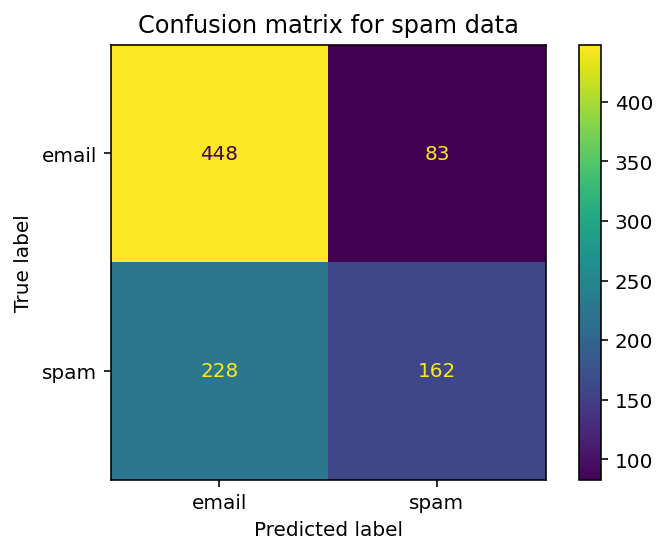

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('data partitioned into  80-20 train-test split')
print('train size = %s; test size = %s' % (len(X_train), len(X_test)))

clf = svm.SVC(kernel='rbf') # using radial-like kernal
# train
clf.fit(X_train, y_train) 
# test
predictions = clf.predict(X_test)
# make the confusion matrix
cm = confusion_matrix(y_test,  predictions, labels=clf.classes_)
# print('clf.classes_:', clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['email','spam'])
disp.plot()
_ = plt.title('Confusion matrix for spam data')

In [6]:
print('sensitivity = %0.4f' % (162 / (162  +  228)))
print('specificity = %0.4f' % (448 / (448 + 83)))

sensitivity = 0.4154
specificity = 0.8437


For the SVM model, sensitivity is 41.5% and specificity is 84.4%.
The tree model in section 9.2.5 had sensitivity 86.3 % and specificity is 93.4%.
The tree model outperformed this SVM model by a wide margin.

Furthermore, the tree model may be more interpretable. The SVM has decision boundaries in a space with 57 dimensions. Properly viewing and understanding these boundaries may be infeasible while the tree model can be interpreted as  a set of rules (such as in Figure 9.5),  to help us understand which email characteristics are  more likely to contribute to the classification of spam.

However, further work could plot the decision boundaries of the SVM model with 2 features at a time, as well as use cross-validation to prune the model and do feature selection, as it  is possible that this model suffered from overfitting.
